# Preliminaries

## Importing packages

In [11]:
import numpy as np

%matplotlib inline

import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_context('notebook')

from thesis_EAfunc import *
from thesis_visfunc import *

# Define landscape

In [12]:
#Problem domain
x_min = -2.5
x_max = 2.5
y_min = -2.5
y_max = 2.5

domain = (x_min, x_max, y_min, y_max)

#Problem definition
def f(x, y):
    D = 2
    alpha = 1/8
    a = np.abs(x ** 2 + y ** 2 - D) ** (alpha * D)
    b = ( 0.5 * (x ** 2 + y ** 2) + (x + y) ) / D
        
    return (a + b + 0.5)

f(-1,-1)

0.0

# Running the Evolutionary Algorithm

## Setting the EA's parameters

In [13]:
#starting seed
np.random.seed(654321)

#Algorithm parameters
## Number of experiments, and generations per experiment
exp_n = 1
gen_f = 40

## Population size
pop_s = 12

## Parent subpopulation's selection method and size
par_selection = 'Ranking'
par_s = 6

## Progeny subpopulation's and size
prog_s = 6
### Crossover Method
crossover = 'None'
### Mutation method, probability and size
mutation = 'random_co_dis'
mut_p = 0.5
mut_s = 0.5

## New population selection method
population_new='Ranking'

## We run the EA for 1 generation

run_n = 0
birthcounter = 0

population, generations, birthcounter, gen_n = EA_start(pop_s, domain, f, birthcounter)

for i in range(gen_f):
    birthcounter, progeny = EA_prog(population, par_s, prog_s, birthcounter, gen_n, mut_p, mut_s, domain, f, par_selection, crossover, mutation)
    generations = EA_prog_to_df(generations, progeny)
    gen_n, population, progeny = EA_new_population(population, progeny, gen_n, pop_s, f, population_new)
    generations = EA_pop_to_df(generations, population)

fitness = EA_fitn_summary(generations)

In [14]:
genera_res, fitness_res = EA_exp(exp_n, gen_f, f, domain, pop_s, par_s, prog_s, mut_p, mut_s, par_selection, crossover, mutation, population_new)

In [15]:
genera_res.head(20)

,run,generation,birthdate,function,fitness,gen_x,gen_y
0,0.0,0.0,0.0,population,1.400563,-1.658550,-1.340030
1,0.0,0.0,1.0,population,1.937875,-0.998618,1.162652
2,0.0,0.0,2.0,population,4.253798,-0.235342,2.315450
3,0.0,0.0,3.0,population,1.862472,-0.696712,0.965858
4,0.0,0.0,4.0,population,3.356215,-1.446190,1.797411
5,0.0,0.0,5.0,population,3.143631,0.191080,1.693509
6,0.0,0.0,6.0,population,1.666042,-0.400435,-2.107011
7,0.0,0.0,7.0,population,1.866466,0.042969,-2.141888
8,0.0,0.0,8.0,population,3.405513,1.393927,-2.338178
9,0.0,0.0,9.0,population,5.389172,1.118570,2.341816


# Visualization
## Fitness development

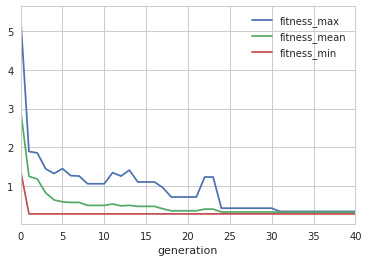

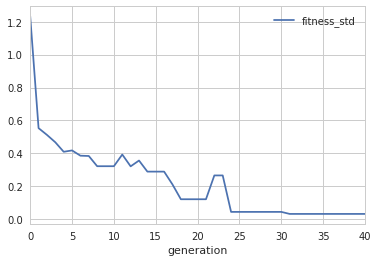

In [16]:
EA_fitn_dev(fitness_res, 0)

## Visualizing Landscape

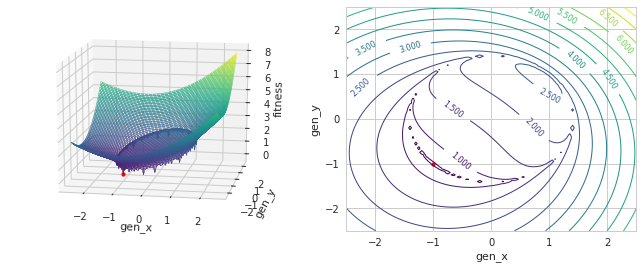

In [17]:
EA_plt_land(f, domain, 101, a=15, b=-80)

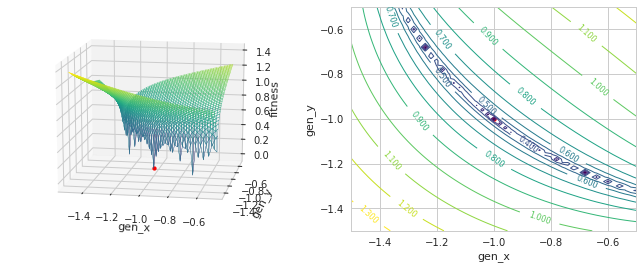

In [18]:
domain_min=(-1.5,-.5,-1.5,-0.5)
EA_plt_land(f, domain_min, 51, a=15, b=-80)

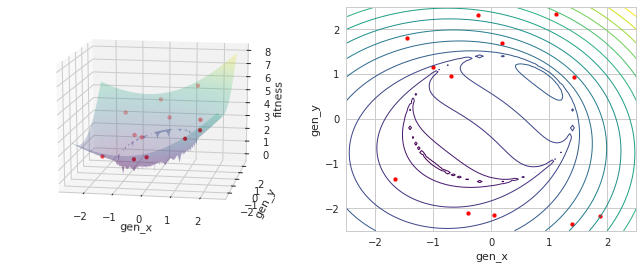

In [19]:
steps=101
run_s=0
gen_s=0
EA_plt_pop(f, domain, steps, genera_res, run_s, gen_s, a=15, b=-80)

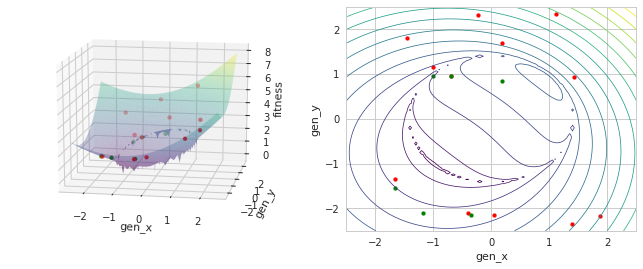

In [20]:
EA_plt_gen(f, domain, steps, genera_res, run_s, gen_s, a=15, b=-80)

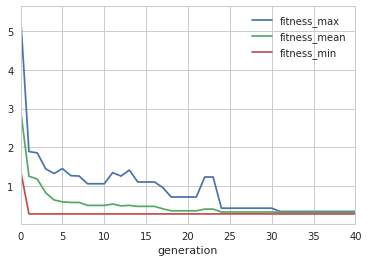

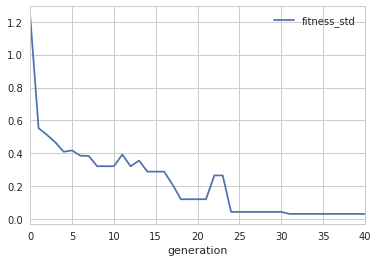

In [11]:
run_s = 0

fitness_s = fitness_res.copy()
fitness_s.reset_index()

fitness_s = fitness_s[fitness_s['run']==run_s]
fitness_s = fitness_s.drop('run', axis = 1)
fitness_s = fitness_s.set_index('generation')

fitness_s.loc[:, fitness_s.columns.difference(['fitness_std'])].plot()
fitness_s.plot(y='fitness_std')
#fitness_s = fitness_s.drop('fitness_std', axis = 1)
#fitness_s.plot()

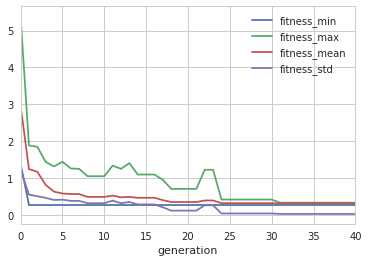

In [12]:
run_s = 0

fitness_g = fitness_res.copy()
fitness_g = fitness_g[fitness_g['run']==run_s]

fitness_g = fitness_g.drop('run', axis = 1)
fitness_g.set_index('generation').plot()

# Data visualization

## Results visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd4576e668>]],
      dtype=object)

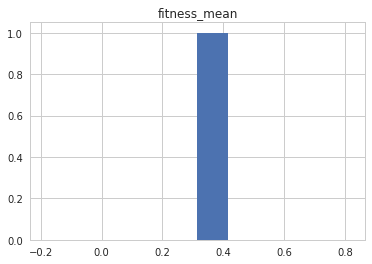

In [13]:
fitness_res[fitness_res['generation']==40].hist(column='fitness_mean')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd4576ecc0>]],
      dtype=object)

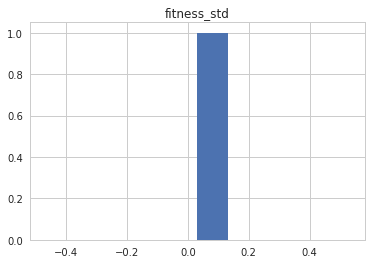

In [14]:
fitness_res[fitness_res['generation']==40].hist(column='fitness_std')

In [15]:
fitness_res

,run,generation,fitness_min,fitness_max,fitness_mean,fitness_std
0,0.0,0.0,1.400563,5.389172,2.970253,1.233395
1,0.0,1.0,0.272626,1.887536,1.246876,0.552972
2,0.0,2.0,0.272626,1.851636,1.174357,0.511931
3,0.0,3.0,0.272626,1.438982,0.817283,0.466974
4,0.0,4.0,0.272626,1.318106,0.634539,0.409184
5,0.0,5.0,0.272626,1.445583,0.585421,0.417458
6,0.0,6.0,0.272626,1.263619,0.570257,0.385451
7,0.0,7.0,0.272626,1.252404,0.569322,0.383626
8,0.0,8.0,0.272626,1.053209,0.492982,0.321447
9,0.0,9.0,0.272626,1.053209,0.492982,0.321447
